In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from inference import inference
import numpy as np

In [2]:
image = Image.open('./erik.png')
erik = cv2.imread('./erik.png')
mask = inference(image)
mask = mask.astype(np.uint8)


mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask = cv2.resize(mask, (1024, 1008))
# mask[mask == 17] = 255
# mask[mask <= 15] = 0


TypeError: inference() missing 3 required positional arguments: 'weights', 'model', and 'device'

In [108]:
erik.shape

(1008, 1024, 3)

In [109]:
mask.shape

(1008, 1024, 3)

In [110]:
blended_image = cv2.addWeighted(erik, 1, mask, 0.4, 0)

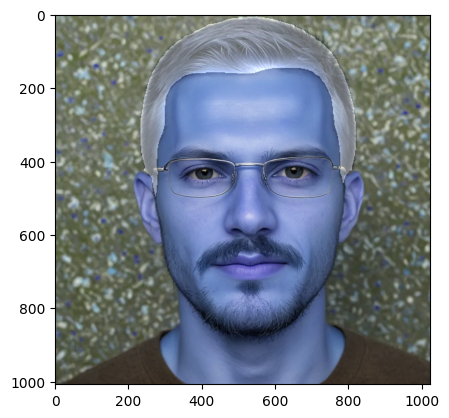

In [111]:
plt.imshow(blended_image)

In [10]:
erik = cv2.imread('./erik.png')
mask = inference(erik)
plt.imshow(mask*70)

TypeError: 'resample' is an invalid keyword argument for this function

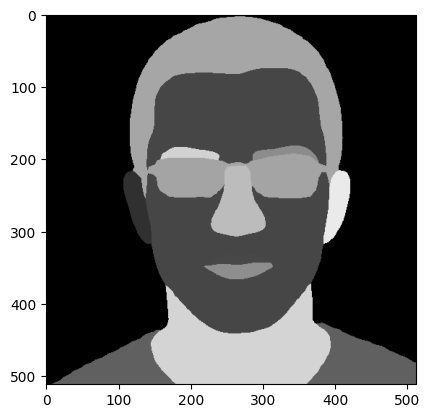

In [23]:
mask = cv2.imread('./test_results/resnet18/erik.png')
plt.imshow(mask*70)

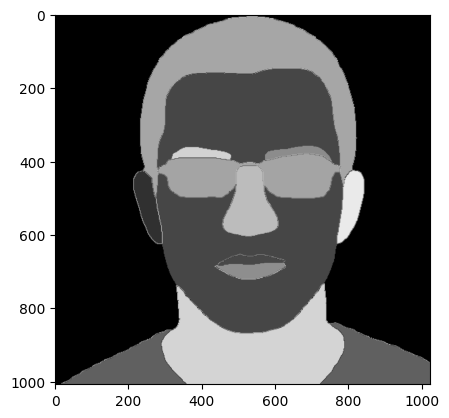

In [24]:
mask = cv2.resize(mask, (erik.shape[1], erik.shape[0]))
plt.imshow(mask*70)

In [20]:
import numpy as np
COLOR_LIST = [
    [0, 0, 0],
    [255, 85, 0],
    [255, 170, 0],
    [255, 0, 85],
    [255, 0, 170],
    [0, 255, 0],
    [85, 255, 0],
    [170, 255, 0],
    [0, 255, 85],
    [0, 255, 170],
    [0, 0, 255],
    [85, 0, 255],
    [170, 0, 255],
    [0, 85, 255],
    [0, 170, 255],
    [255, 255, 0],
    [255, 255, 85],
    [255, 255, 170],
    [255, 0, 255],
]

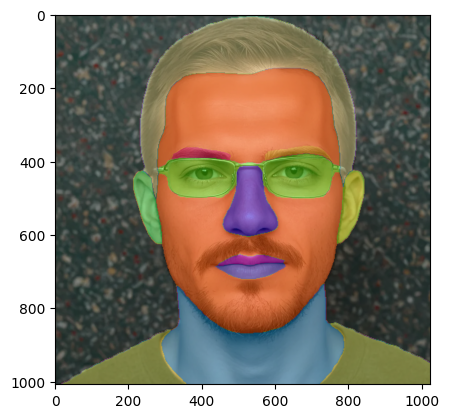

In [28]:
import numpy as np
import cv2

# Convert segmentation mask to uint8
segmentation_mask = mask.copy().astype(np.uint8)
image = np.array(erik).copy().astype(np.uint8)

# Create a color mask with dtype=np.uint8
segmentation_mask_color = np.zeros(
    (segmentation_mask.shape[0], segmentation_mask.shape[1], 3), dtype=np.uint8
)

num_classes = np.max(segmentation_mask)

# Fill the color mask with the respective colors
for class_index in range(1, num_classes + 1):
    class_pixels = np.where(segmentation_mask == class_index)
    segmentation_mask_color[class_pixels[0], class_pixels[1], :] = COLOR_LIST[
        class_index
    ]

# Convert image to BGR format
bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Blend the image with the segmentation mask
blended_image = cv2.addWeighted(bgr_image, 0.6, segmentation_mask_color, 0.4, 0)
plt.imshow(blended_image)